In [44]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import trompy as tp

In [45]:
# read in csv file(s)
PATH_TO_WORKBOOK = Path("C:/Users/jmc010/UiT Office 365/O365-Pipette 2 - Documents/People/Marije")
EXCEL_WORKBOOK = "measurements_b3_1.xls"
rows, header = tp.metafilereader(str(PATH_TO_WORKBOOK / EXCEL_WORKBOOK), sheetname="metafile_niacin")


# how about a google drive but that we save a csv file for every day

File is excel file. Making csv metafile first


In [46]:
def get_value(row):
    if row['sex'] == 'female' and row['group'] == 'control':
        return 0
    elif row['sex'] == 'female' and row['group'] == 'experimental':
        return 1
    elif row['sex'] == 'male' and row['group'] == 'control':
        return 2
    elif row['sex'] == 'male' and row['group'] == 'experimental':
        return 3
    else:
        return -1

def tweak_df(df):
    
    return (df
            .query("bodyweight != ''")
            .astype({"sex": "category",
                     "group": "category",
                     "diet": "category",
                     "bodyweight": float,
                     "food_intake": float,
                     "water_intake": float
                     }
                    )
             .assign(groupn = lambda df_: df_.apply(get_value, axis=1))
            )
    
df = tweak_df(pd.DataFrame(rows, columns=header))

In [47]:
df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.8,-1.0,60.7,-1.0,-1.0,50.9,-1.0,2
1,B3102,male,control,control,2024-02-12,0.0,24.7,-1.0,56.0,-1.0,-1.0,50.4,-1.0,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.9,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
4,B3105,male,control,control,2024-02-12,0.0,25.4,-1.0,56.3,-1.0,-1.0,50.9,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,B3128,female,experimental,control,2024-02-16,30.0,21.6,68.5,64.6,3.9,52.7,48.7,4.0,1
156,B3129,female,control,control,2024-02-16,0.0,21.4,76.9,73.2,3.7,51.9,48.2,3.7,0
157,B3130,female,control,control,2024-02-16,0.0,21.0,76.4,72.5,3.9,51.7,48.5,3.2,0
158,B3131,female,experimental,control,2024-02-16,30.0,20.5,69.9,66.5,3.4,51.6,48.8,2.8,1


In [48]:
df.dtypes

animal_id            object
sex                category
group              category
diet               category
date                 object
niacin              float64
bodyweight          float64
food_yesterday       object
food_today           object
food_intake         float64
water_yesterday      object
water_today          object
water_intake        float64
groupn                int64
dtype: object

In [49]:
df.groupby(["sex", "group", "date"]).mean().reset_index()

C:\Users\jmc010\AppData\Local\Temp\ipykernel_12912\1390042850.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["sex", "group", "date"]).mean().reset_index()


,sex,group,date,niacin,bodyweight,food_intake,water_intake,groupn
0,female,control,2024-02-12,0.0,20.4125,-1.0000,-1.0000,0.0
1,female,control,2024-02-13,0.0,19.9375,2.8875,9.0125,0.0
2,female,control,2024-02-14,0.0,20.0625,2.9375,3.0625,0.0
3,female,control,2024-02-15,0.0,20.0875,2.9875,3.0000,0.0
4,female,control,2024-02-16,0.0,20.2125,3.3625,3.1500,0.0
5,female,experimental,2024-02-12,0.0,20.6125,-1.0000,-1.0000,1.0
6,female,experimental,2024-02-13,0.0,20.3875,2.8500,2.7875,1.0
7,female,experimental,2024-02-14,0.0,20.4625,2.8000,2.8000,1.0
8,female,experimental,2024-02-15,30.0,20.8000,2.9750,3.0500,1.0
9,female,experimental,2024-02-16,30.0,20.5750,3.3875,3.6125,1.0


C:\Users\jmc010\AppData\Local\Temp\ipykernel_12912\3705321438.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = df.groupby(["sex", "group", "date"]).mean().reset_index()
C:\Users\jmc010\AppData\Local\Temp\ipykernel_12912\3705321438.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sem = df.groupby(["sex", "group", "date"]).sem().reset_index()


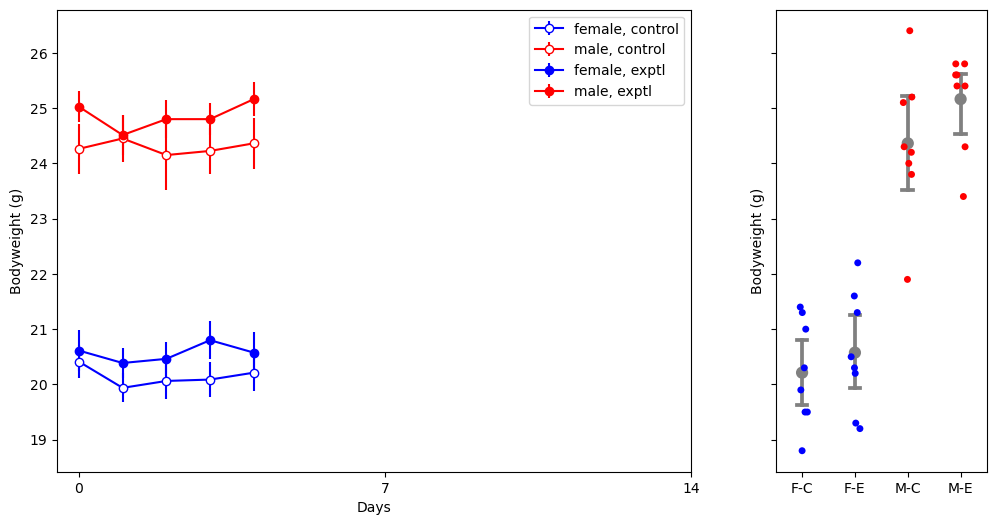

In [50]:
# Find mean and SEM of all data
mean = df.groupby(["sex", "group", "date"]).mean().reset_index()
sem = df.groupby(["sex", "group", "date"]).sem().reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4))

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="blue",
               label="female, control"
                )

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'control'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'control'").bodyweight,
               marker="o", markerfacecolor="white", color="red",
               label="male, control")

ax[0].errorbar(x,
               mean.query("sex == 'female' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'female' and group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="blue", color="blue",
               label="female, exptl")

ax[0].errorbar(x,
               mean.query("sex == 'male' and group == 'experimental'").bodyweight,
               yerr=sem.query("sex == 'male' and group == 'experimental'").bodyweight,
               marker="o", markerfacecolor="red", color="red",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,14])
ax[0].set_xticks([0,7,14])

# Add labels
ax[0].set_ylabel("Bodyweight (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["blue", "blue", "red", "red"]

sns.stripplot(data=today_df, x="groupn", y="bodyweight", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='bodyweight', capsize=.2, color="grey", markers='o', markerfacecolor="white", join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Bodyweight (g)")
ax[1].legend().remove()

In [43]:
df

,animal_id,sex,group,diet,date,niacin,bodyweight,food_yesterday,food_today,food_intake,water_yesterday,water_today,water_intake,groupn
0,B3101,male,control,control,2024-02-12,0.0,21.800000,-1.0,60.7,-1.0,-1.0,50.9,-1.0,2
1,B3102,male,control,control,2024-02-12,0.0,24.700000,-1.0,56.0,-1.0,-1.0,50.4,-1.0,2
2,B3103,male,experimental,control,2024-02-12,0.0,24.900000,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
3,B3104,male,experimental,control,2024-02-12,0.0,24.900000,-1.0,54.5,-1.0,-1.0,50.5,-1.0,3
4,B3105,male,control,control,2024-02-12,0.0,25.400000,-1.0,56.3,-1.0,-1.0,50.9,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,B3128,female,experimental,control,2024-02-15,30.0,22.086481,69.4,66.1,3.3,51.3,48.1,3.2,1
124,B3129,female,control,control,2024-02-15,0.0,21.982147,74.2,70.9,3.3,51.8,48.6,3.2,0
125,B3130,female,control,control,2024-02-15,0.0,21.877812,74.0,71.4,2.6,51.5,48.4,3.1,0
126,B3131,female,experimental,control,2024-02-15,30.0,21.773478,87.8,85.4,2.4,51.6,49.2,2.4,1


In [71]:
# Food intake figure

# Clean up df

def remove_and_clean(df):
    """Removes unecessary rows and cleans data to get rid of erroneous values.

    Args:
        df (Pandas dataframe): Contains data from niacin experiment

    Returns:
        Dataframe: Cleaned dataframe
    """
    return (df
            .query("food_yesterday != -1.0")
            
            .assign(food_intake = lambda df_: [x if x > 1 else np.nan for x in df_.food_intake])
            .assign(food_intake = lambda df_: [x if x < df_.food_intake.mean()*3 else np.nan for x in df_.food_intake])
            .assign(food_intake = lambda df_: [x if not np.isnan(x) else df_.food_intake.mean() for x in df_.food_intake])
            .assign(water_intake = lambda df_: [x if x > 1 else np.nan for x in df_.water_intake])
            .assign(water_intake = lambda df_: [x if x < df_.water_intake.mean()*2 else np.nan for x in df_.water_intake])
            .assign(water_intake = lambda df_: [x if not np.isnan(x) else df_.water_intake.mean() for x in df_.water_intake])
    )

df_food_water = remove_and_clean(df)


2.9716535433070863

C:\Users\jmc010\AppData\Local\Temp\ipykernel_12912\311996750.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean().reset_index()
C:\Users\jmc010\AppData\Local\Temp\ipykernel_12912\311996750.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem().reset_index()


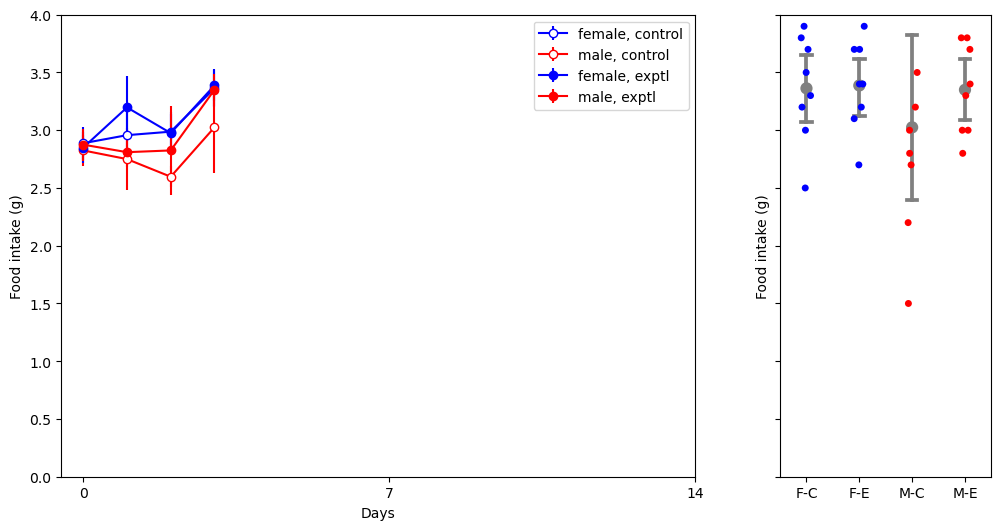

In [80]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean().reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem().reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4) - 1)

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").food_intake,
               marker="o", markerfacecolor="white", color="red",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").food_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").food_intake,
               marker="o", markerfacecolor="red", color="red",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,14])
ax[0].set_xticks([0,7,14])

ax[0].set_ylim([0,4])

# Add labels
ax[0].set_ylabel("Food intake (g)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["blue", "blue", "red", "red"]

sns.stripplot(data=today_df, x="groupn", y="food_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='food_intake', capsize=.2, color="grey", markers='o', markerfacecolor="white", join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Food intake (g)")
ax[1].legend().remove()


C:\Users\jmc010\AppData\Local\Temp\ipykernel_12912\1030430224.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean().reset_index()
C:\Users\jmc010\AppData\Local\Temp\ipykernel_12912\1030430224.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sem is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem().reset_index()


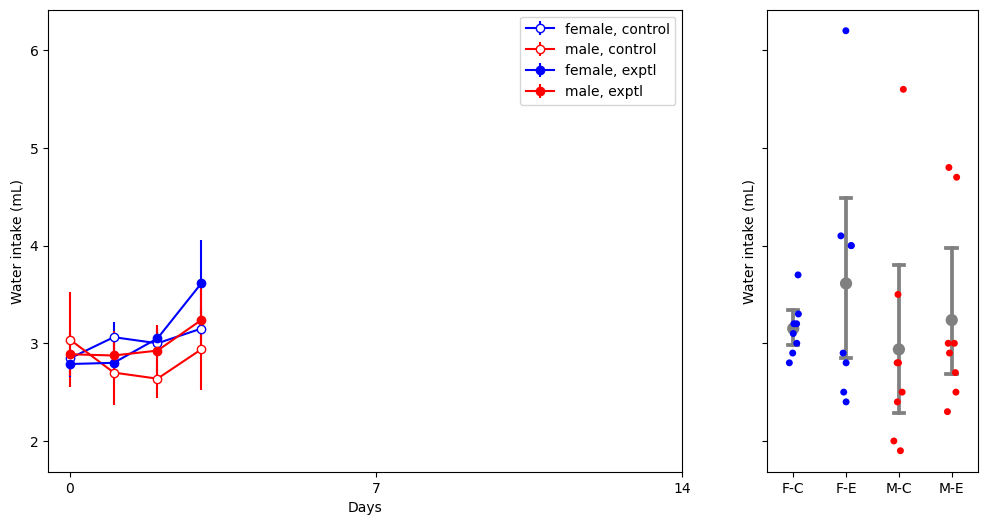

In [81]:
# Find mean and SEM of all data
mean_fw = df_food_water.groupby(["sex", "group", "date"]).mean().reset_index()
sem_fw = df_food_water.groupby(["sex", "group", "date"]).sem().reset_index()

# Generate figure with two subplots
f, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True,
                     gridspec_kw={"width_ratios": [3, 1]},)

# Set x values based on number of days
x = np.arange(int(len(mean.date) / 4) - 1)

# Plot data for each group in first subplot
ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'control'").water_intake,
               marker="o", markerfacecolor="white", color="blue",
               label="female, control"
                )

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'control'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'control'").water_intake,
               marker="o", markerfacecolor="white", color="red",
               label="male, control")

ax[0].errorbar(x,
               mean_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'female' and group == 'experimental'").water_intake,
               marker="o", markerfacecolor="blue", color="blue",
               label="female, exptl")

ax[0].errorbar(x,
               mean_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               yerr=sem_fw.query("sex == 'male' and group == 'experimental'").water_intake,
               marker="o", markerfacecolor="red", color="red",
               label="male, exptl")

# Set x axis limits and ticks
ax[0].set_xlim([-0.5,14])
ax[0].set_xticks([0,7,14])

# ax[0].set_ylim([0,4])

# Add labels
ax[0].set_ylabel("Water intake (mL)")
ax[0].set_xlabel("Days")

ax[0].legend()

# Plot today's data in second subplot
today = df.date.max()
today_df = df.query("date == @today")

palette = ["blue", "blue", "red", "red"]

sns.stripplot(data=today_df, x="groupn", y="water_intake", hue="groupn", palette=palette, ax=ax[1])
sns.pointplot(data=today_df, x='groupn', y='water_intake', capsize=.2, color="grey", markers='o', markerfacecolor="white", join=False, ax=ax[1])

ax[1].set_xticklabels(["F-C", "F-E", "M-C", "M-E"])
ax[1].set_xlabel("")
ax[1].set_ylabel("Water intake (mL)")
ax[1].legend().remove()


In [ ]:
# List of figures

# body weight graphs
# body weight of CON vs ND, male vs female
# bar graph and daily line graph
# most recent day change from last 3 days? (barscatter)


# food intake



# niacin concentration



#individual mice showing all on one graph